In [ ]:
print("Hola Worldo!")

Hola Worldo!


In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("proteinas_20000_enriquecido.csv")

In [9]:
df.head()

,ID_Proteína,Sequência,Massa_Molecular,Ponto_Isoelétrico,Hidrofobicidade,Carga_Total,Proporção_Polar,Proporção_Apolar,Comprimento_Sequência,Classe
0,P00001,YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEP...,24667.4032,5.655161,0.105263,4,0.210526,0.349282,209,Receptora
1,P00002,CLAIWQQFHNWGDEDLTNTSGNCYSAVCGAWSMEAWNVVCYWGFDL...,21284.0710,5.892805,0.150838,3,0.189944,0.418994,179,Estrutural
2,P00003,QFPGVGNAVQARHMKGTRIHIWIHWARITAIETNQGKNEFPMCTVK...,17255.9747,7.228237,0.171141,9,0.181208,0.422819,149,Enzima
3,P00004,HTHIYATIVTWQCNLTQWELQRGAPNVYNWNSNYGYYVHTGLHWYW...,11792.1909,8.434802,0.173469,7,0.275510,0.408163,98,Transporte
4,P00005,NWFTYSTLKKTYFLSATGCEKGYAYRLTTYTYIAPWSMNPLNTHIE...,22641.7108,7.080968,0.162234,5,0.202128,0.430851,188,Outras


In [10]:
columns_pt = [
    "ID_Proteína", "Sequência", "Massa_Molecular", "Ponto_Isoelétrico",
    "Hidrofobicidade", "Carga_Total", "Proporção_Polar",
    "Proporção_Apolar", "Comprimento_Sequência", "Classe"
]

# English translations
columns_en = [
    "Protein_ID", "Sequence", "Molecular_Weight", "Isoelectric_Point",
    "Hydrophobicity", "Total_Charge", "Polar_Proportion",
    "Apolar_Proportion", "Sequence_Length", "Class"
]

# Create a mapping dictionary
column_mapping = dict(zip(columns_pt, columns_en))

# Assuming your DataFrame is named df:
df = df.rename(columns=column_mapping)

In [11]:
df.head()

,Protein_ID,Sequence,Molecular_Weight,Isoelectric_Point,Hydrophobicity,Total_Charge,Polar_Proportion,Apolar_Proportion,Sequence_Length,Class
0,P00001,YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEP...,24667.4032,5.655161,0.105263,4,0.210526,0.349282,209,Receptora
1,P00002,CLAIWQQFHNWGDEDLTNTSGNCYSAVCGAWSMEAWNVVCYWGFDL...,21284.0710,5.892805,0.150838,3,0.189944,0.418994,179,Estrutural
2,P00003,QFPGVGNAVQARHMKGTRIHIWIHWARITAIETNQGKNEFPMCTVK...,17255.9747,7.228237,0.171141,9,0.181208,0.422819,149,Enzima
3,P00004,HTHIYATIVTWQCNLTQWELQRGAPNVYNWNSNYGYYVHTGLHWYW...,11792.1909,8.434802,0.173469,7,0.275510,0.408163,98,Transporte
4,P00005,NWFTYSTLKKTYFLSATGCEKGYAYRLTTYTYIAPWSMNPLNTHIE...,22641.7108,7.080968,0.162234,5,0.202128,0.430851,188,Outras


In [12]:
df.value_counts()

Protein_ID  Sequence                                                                                                                                                                                                                                                                                                 Molecular_Weight  Isoelectric_Point  Hydrophobicity  Total_Charge  Polar_Proportion  Apolar_Proportion  Sequence_Length  Class     
P00001      YDRRHIIGFLHFDMQEFITDTAANHTSGSSWEHMELPDTLLPCCEPLVIHVQRCLMCCAQDYHTTSVFDACPGDCKSHVARSWSPKFWDIQMDQFIMIINTTKEKNWNMEWNPINDQPDGDTESDGKNPQHPNHVKKQSGESGWLRVDYSLVFRPTGEHERLDLWTFVLCFQYIWHWPHISQHEMAASAKHPVWGDELMFGRHRYHQEN                                                                                        24667.4032        5.655161           0.105263         4            0.210526          0.349282           209              Receptora     1
P40005      KENIWNYEEQKYNRRNAHIRCPQEESRDNVSVSAFRVYTPDAGGPSHLGAIFFEVTDEFYRSWKHKCDDLHCTQFLPIREKYYPNNEVCWLNYFEITVHEC

In [13]:

# Data Quality Assessment and Cleaning
print("=== Data Quality Assessment ===")
print(f"Original dataset shape: {df.shape}")
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for empty sequences
print(f"\nEmpty sequences (null): {df['Sequence'].isnull().sum()}")
print(f"Empty string sequences: {(df['Sequence'] == '').sum()}")
print(f"Whitespace-only sequences: {df['Sequence'].str.strip().eq('').sum()}")

# Clean the data
original_shape = df.shape
df_clean = df[
    df['Sequence'].notna() &
    (df['Sequence'] != '') &
    (df['Sequence'].str.strip() != '')
].copy().reset_index(drop=True)

print(f"\nAfter cleaning: {df_clean.shape}")
print(f"Rows removed: {original_shape[0] - df_clean.shape[0]}")
print(f"Data retention: {(df_clean.shape[0] / original_shape[0]) * 100:.2f}%")

=== Data Quality Assessment ===
Original dataset shape: (60000, 10)

Missing values per column:
Protein_ID           0
Sequence             0
Molecular_Weight     0
Isoelectric_Point    0
Hydrophobicity       0
Total_Charge         0
Polar_Proportion     0
Apolar_Proportion    0
Sequence_Length      0
Class                0
dtype: int64

Empty sequences (null): 0
Empty string sequences: 0
Whitespace-only sequences: 0

After cleaning: (60000, 10)
Rows removed: 0
Data retention: 100.00%


Class
Outras        12216
Estrutural    11991
Transporte    11989
Enzima        11954
Receptora     11850
Name: count, dtype: int64

Number of classes: 5
Classes: ['Receptora', 'Estrutural', 'Enzima', 'Transporte', 'Outras']


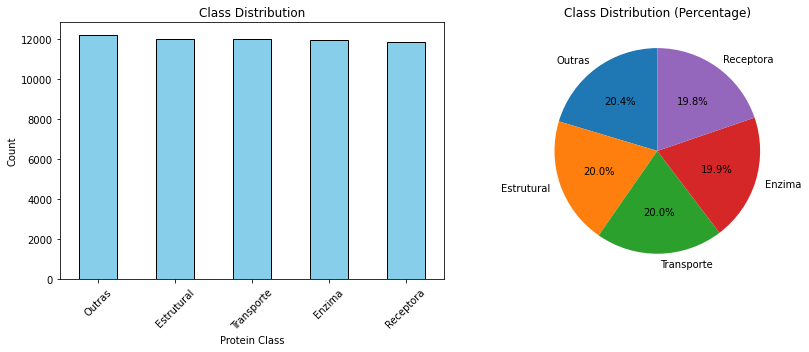


Class imbalance ratio (max/min): 1.03
✓ Classes are reasonably balanced


In [14]:
from matplotlib import pyplot as plt
# Class Distribution Analysis
# print("=== Class Distribution Analysis ===")
class_counts = df_clean['Class'].value_counts()
print(class_counts)
print(f"\nNumber of classes: {df_clean['Class'].nunique()}")
print(f"Classes: {df_clean['Class'].unique().tolist()}")

# Visualize class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Protein Class')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Check for class imbalance
min_class = class_counts.min()
max_class = class_counts.max()
imbalance_ratio = max_class / min_class
print(f"\nClass imbalance ratio (max/min): {imbalance_ratio:.2f}")
if imbalance_ratio > 3:
    print("⚠️  Significant class imbalance detected - consider balancing techniques")
else:
    print("✓ Classes are reasonably balanced")

In [15]:

# Numerical Features Analysis and Scaling Assessment
print("=== Numerical Features Analysis ===")

# Select numerical columns (excluding ID and target)
numerical_cols = ['Molecular_Weight', 'Isoelectric_Point', 'Hydrophobicity', 
                 'Total_Charge', 'Polar_Proportion', 'Apolar_Proportion', 'Sequence_Length']

print("Numerical features statistics:")
print(df_clean[numerical_cols].describe())

# Check for scaling needs
print("\n=== Feature Scaling Analysis ===")
for col in numerical_cols:
    col_range = df_clean[col].max() - df_clean[col].min()
    col_std = df_clean[col].std()
    col_mean = df_clean[col].mean()
    print(f"{col}:")
    print(f"  Range: {col_range:.2f}, Std: {col_std:.2f}, Mean: {col_mean:.2f}")
    if col != 'Molecular_Weight':
        scale_factor = col_range / (df_clean['Molecular_Weight'].max() - df_clean['Molecular_Weight'].min())
        print(f"  Scale factor vs Molecular_Weight: {scale_factor:.2e}")
    print()

print("🔍 SCALING RECOMMENDATION:")
print("YES - Features have very different scales!")
print("• Molecular_Weight: ~20,000+ range")
print("• Proportions: 0-1 range") 
print("• Point estimates: various ranges")
print("Recommended: StandardScaler or MinMaxScaler for better model performance")

=== Numerical Features Analysis ===
Numerical features statistics:
       Molecular_Weight  Isoelectric_Point  Hydrophobicity  Total_Charge  \
count      60000.000000       60000.000000    60000.000000  60000.000000   
mean       20798.002743           7.259727        0.149968      8.727517   
std         8611.766490           1.447584        0.027094      7.503895   
min         5407.315100           4.050028        0.000000    -18.000000   
25%        13353.876800           6.051557        0.133136      3.000000   
50%        20784.058050           7.155000        0.150000      8.000000   
75%        28221.612275           8.585916        0.166667     13.000000   
max        37097.077600          11.785610        0.289474     52.000000   

       Polar_Proportion  Apolar_Proportion  Sequence_Length  
count      60000.000000       60000.000000     60000.000000  
mean           0.199930           0.400025       174.775683  
std            0.033709           0.041577        72.330865  


In [16]:

# Numerical Features Analysis and Scaling Assessment
print("=== Numerical Features Analysis ===")

# Select numerical columns (excluding ID and target)
numerical_cols = ['Molecular_Weight', 'Isoelectric_Point', 'Hydrophobicity', 
                 'Total_Charge', 'Polar_Proportion', 'Apolar_Proportion', 'Sequence_Length']

print("Numerical features statistics:")
print(df_clean[numerical_cols].describe())

# Check for scaling needs
print("\n=== Feature Scaling Analysis ===")
for col in numerical_cols:
    col_range = df_clean[col].max() - df_clean[col].min()
    col_std = df_clean[col].std()
    col_mean = df_clean[col].mean()
    print(f"{col}:")
    print(f"  Range: {col_range:.2f}, Std: {col_std:.2f}, Mean: {col_mean:.2f}")
    if col != 'Molecular_Weight':
        scale_factor = col_range / (df_clean['Molecular_Weight'].max() - df_clean['Molecular_Weight'].min())
        print(f"  Scale factor vs Molecular_Weight: {scale_factor:.2e}")
    print()

print("🔍 SCALING RECOMMENDATION:")
print("YES - Features have very different scales!")
print("• Molecular_Weight: ~20,000+ range")
print("• Proportions: 0-1 range") 
print("• Point estimates: various ranges")
print("Recommended: StandardScaler or MinMaxScaler for better model performance")

=== Numerical Features Analysis ===
Numerical features statistics:
       Molecular_Weight  Isoelectric_Point  Hydrophobicity  Total_Charge  \
count      60000.000000       60000.000000    60000.000000  60000.000000   
mean       20798.002743           7.259727        0.149968      8.727517   
std         8611.766490           1.447584        0.027094      7.503895   
min         5407.315100           4.050028        0.000000    -18.000000   
25%        13353.876800           6.051557        0.133136      3.000000   
50%        20784.058050           7.155000        0.150000      8.000000   
75%        28221.612275           8.585916        0.166667     13.000000   
max        37097.077600          11.785610        0.289474     52.000000   

       Polar_Proportion  Apolar_Proportion  Sequence_Length  
count      60000.000000       60000.000000     60000.000000  
mean           0.199930           0.400025       174.775683  
std            0.033709           0.041577        72.330865  


In [17]:


# BERT Encoding Strategy for Protein Sequences
print("=== PROTEIN SEQUENCE ENCODING STRATEGIES ===")
print()
print("🧬 BERT-BASED APPROACHES (EXCELLENT CHOICE!):") 
print()
print("1. ProtBERT (HIGHLY RECOMMENDED):")
print("   • Pre-trained on 200M protein sequences")
print("   • Understands evolutionary and structural patterns")
print("   • Model: 'Rostlab/prot_bert' or 'Rostlab/prot_bert_bfd'")
print("   • Output: 768-dimensional embeddings")
print()
print("2. ESM (Evolutionary Scale Modeling) - Meta/Facebook:")
print("   • State-of-the-art protein language model")
print("   • ESM-2 models: 'facebook/esm2_t6_8M_UR50D' (small, fast)")
print("   •                'facebook/esm2_t12_35M_UR50D' (medium)")
print("   •                'facebook/esm2_t30_150M_UR50D' (large)")
print("   • Often outperforms ProtBERT")
print()
print("3. ProtT5:")
print("   • Google T5 architecture adapted for proteins")
print("   • Model: 'Rostlab/prot_t5_xl_uniref50'")
print("   • Good alternative to ProtBERT")
print()

# Sequence length analysis for BERT considerations
seq_lengths = df_clean['Sequence'].str.len()
print("📊 SEQUENCE LENGTH ANALYSIS FOR BERT:")
print(f"• Max sequence length: {seq_lengths.max()}")
print(f"• Average sequence length: {seq_lengths.mean():.1f}")
print(f"• 95th percentile: {seq_lengths.quantile(0.95):.0f}")
print(f"• Sequences > 512 tokens: {(seq_lengths > 512).sum()} ({(seq_lengths > 512).mean()*100:.1f}%)")
print()
print("⚡ IMPLEMENTATION RECOMMENDATIONS:")
print("• Use max_length=512 for tokenizer (BERT standard)")
print("• Truncate longer sequences (minimal data loss)")
print("• Use mean pooling of token embeddings")
print("• Consider [CLS] token for classification tasks")
print("• Batch processing for efficiency")

=== PROTEIN SEQUENCE ENCODING STRATEGIES ===

🧬 BERT-BASED APPROACHES (EXCELLENT CHOICE!):

1. ProtBERT (HIGHLY RECOMMENDED):
   • Pre-trained on 200M protein sequences
   • Understands evolutionary and structural patterns
   • Model: 'Rostlab/prot_bert' or 'Rostlab/prot_bert_bfd'
   • Output: 768-dimensional embeddings

2. ESM (Evolutionary Scale Modeling) - Meta/Facebook:
   • State-of-the-art protein language model
   • ESM-2 models: 'facebook/esm2_t6_8M_UR50D' (small, fast)
   •                'facebook/esm2_t12_35M_UR50D' (medium)
   •                'facebook/esm2_t30_150M_UR50D' (large)
   • Often outperforms ProtBERT

3. ProtT5:
   • Google T5 architecture adapted for proteins
   • Model: 'Rostlab/prot_t5_xl_uniref50'
   • Good alternative to ProtBERT

📊 SEQUENCE LENGTH ANALYSIS FOR BERT:
• Max sequence length: 300
• Average sequence length: 174.8
• 95th percentile: 288
• Sequences > 512 tokens: 0 (0.0%)

⚡ IMPLEMENTATION RECOMMENDATIONS:
• Use max_length=512 for tokenizer (BER

In [27]:
# Classical Protein Sequence Encoding Implementation
print("=== CLASSICAL PROTEIN SEQUENCE ENCODING ===")

import numpy as np
from itertools import product
import time

# Define amino acids
AMINO_ACIDS = 'ACDEFGHIKLMNPQRSTVWY'

def amino_acid_composition(sequence):
    """Calculate amino acid composition (20 features)"""
    composition = []
    seq_len = len(sequence)
    for aa in AMINO_ACIDS:
        frequency = sequence.count(aa) / seq_len if seq_len > 0 else 0
        composition.append(frequency)
    return composition

def dipeptide_composition(sequence):
    """Calculate dipeptide composition (400 features)"""
    dipeptides = [''.join(pair) for pair in product(AMINO_ACIDS, repeat=2)]
    composition = []
    seq_len = len(sequence)
    
    if seq_len < 2:
        return [0] * 400
    
    for dipeptide in dipeptides:
        count = sum(1 for i in range(seq_len - 1) 
                   if sequence[i:i+2] == dipeptide)
        frequency = count / (seq_len - 1)
        composition.append(frequency)
    return composition

def non_redundant_properties(sequence):
    """
    Calculate ONLY non-redundant physicochemical properties (3 features)
    Avoids overlap with existing dataset features
    """
    if len(sequence) == 0:
        return [0, 0, 0]
    
    # Property groups NOT in your dataset
    aromatic = {'F', 'W', 'Y'}          # Aromatic amino acids
    tiny = {'A', 'C', 'G', 'S', 'T'}   # Tiny amino acids  
    aliphatic = {'A', 'I', 'L', 'V'}   # Aliphatic amino acids
    
    seq_len = len(sequence)
    
    # Calculate ratios
    aromaticity = sum(1 for aa in sequence if aa in aromatic) / seq_len
    tiny_ratio = sum(1 for aa in sequence if aa in tiny) / seq_len
    aliphatic_ratio = sum(1 for aa in sequence if aa in aliphatic) / seq_len
    
    return [aromaticity, tiny_ratio, aliphatic_ratio]

def encode_protein_sequences_non_redundant(sequences, verbose=True):
    """
    Encode protein sequences with NON-REDUNDANT features only
    
    Parameters:
    - sequences: list of protein sequences
    - verbose: print progress
    
    Returns:
    - encoded_features: numpy array of shape (n_sequences, 423)
      • 20 amino acid composition features
      • 400 dipeptide composition features  
      • 3 non-redundant physicochemical properties
    """
    encoded_sequences = []
    start_time = time.time()
    
    if verbose:
        print(f"Encoding {len(sequences)} sequences with non-redundant features...")
    
    for i, sequence in enumerate(sequences):
        if verbose and (i + 1) % 2000 == 0:
            print(f"  Processed {i + 1}/{len(sequences)} sequences...")
        
        # Clean sequence (remove non-standard amino acids)
        clean_seq = ''.join([aa for aa in sequence.upper() if aa in AMINO_ACIDS])
        
        if len(clean_seq) == 0:
            # Handle empty sequences - total 423 features
            features = [0] * 423
        else:
            # Calculate all non-redundant features
            aac = amino_acid_composition(clean_seq)                    # 20 features
            dipep = dipeptide_composition(clean_seq)                   # 400 features
            props = non_redundant_properties(clean_seq)                # 3 features
            
            # Combine all features: 20 + 400 + 3 = 423
            features = aac + dipep + props
        
        encoded_sequences.append(features)
    
    encoded_array = np.array(encoded_sequences)
    
    if verbose:
        elapsed_time = time.time() - start_time
        print(f"✓ Non-redundant encoding completed in {elapsed_time:.2f} seconds")
        print(f"✓ Output shape: {encoded_array.shape}")
        print(f"✓ Feature breakdown:")
        print("  - Amino acid composition: 20 features")
        print("  - Dipeptide composition: 400 features")
        print("  - Non-redundant properties: 3 features")
        print("  - Total NEW sequence features: 423")
        print("✓ No overlap with existing numerical features!")
    
    return encoded_array

print("✓ Encoding functions ready!")

=== CLASSICAL PROTEIN SEQUENCE ENCODING ===
✓ Encoding functions ready!


In [28]:
numerical_cols = ['Molecular_Weight', 'Isoelectric_Point', 'Hydrophobicity', 
                 'Total_Charge', 'Polar_Proportion', 'Apolar_Proportion', 'Sequence_Length']

# Separate features and target
X_sequences = df_clean['Sequence'].copy()
X_numerical = df_clean[numerical_cols].copy()
y = df_clean['Class'].copy()

In [29]:
print(f"\nFeatures extracted:")
print(f"  Sequences: {len(X_sequences)}")
print(f"  Numerical features: {X_numerical.shape}")
print(f"  Target classes: {y.nunique()} ({', '.join(y.unique())})")



Features extracted:
  Sequences: 60000
  Numerical features: (60000, 7)
  Target classes: 5 (Receptora, Estrutural, Enzima, Transporte, Outras)


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"\nClass encoding:")
for i, class_name in enumerate(label_encoder.classes_):
    print(f"  {class_name}: {i}")


Class encoding:
  Enzima: 0
  Estrutural: 1
  Outras: 2
  Receptora: 3
  Transporte: 4


In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
print(f"\nScaling numerical features...")
num_scaler = StandardScaler()
X_numerical_scaled = num_scaler.fit_transform(X_numerical)
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=numerical_cols)

print(f"Numerical features after scaling:")
print(f"  Mean ≈ 0: {abs(X_numerical_scaled.mean().mean()):.6f}")
print(f"  Std ≈ 1: {abs(X_numerical_scaled.std().mean() - 1):.6f}")



Scaling numerical features...
Numerical features after scaling:
  Mean ≈ 0: 0.000000
  Std ≈ 1: 0.000008


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# TRAIN-TEST SPLIT
print(f"\nPerforming train-test split (80/20, stratified)...")
X_train_seq, X_test_seq, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_sequences, X_numerical_scaled, y_encoded,
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded  # Maintain class distribution
)

print(f"\n✅ TRAIN-TEST SPLIT COMPLETE:")
print(f"Training set: {len(X_train_seq):,} samples")
print(f"Test set: {len(X_test_seq):,} samples")
print(f"Training ratio: {len(X_train_seq) / len(X_sequences) * 100:.1f}%")



Performing train-test split (80/20, stratified)...

✅ TRAIN-TEST SPLIT COMPLETE:
Training set: 48,000 samples
Test set: 12,000 samples
Training ratio: 80.0%


In [42]:
# Encode Training and Test Sequences
print("=== ENCODING PROTEIN SEQUENCES ===")

# Encode training sequences
print("Encoding training sequences...")
X_train_seq_encoded = encode_protein_sequences_non_redundant(
    X_train_seq.tolist(), 
    verbose=True
)

# Encode test sequences
print("\nEncoding test sequences...")
X_test_seq_encoded = encode_protein_sequences_non_redundant(
    X_test_seq.tolist(), 
    verbose=True
)

print(f"\n✅ SEQUENCE ENCODING COMPLETE!")
print(f"Training sequence features: {X_train_seq_encoded.shape}")
print(f"Test sequence features: {X_test_seq_encoded.shape}")

=== ENCODING PROTEIN SEQUENCES ===
Encoding training sequences...
Encoding 48000 sequences with non-redundant features...
  Processed 2000/48000 sequences...
  Processed 4000/48000 sequences...
  Processed 6000/48000 sequences...
  Processed 8000/48000 sequences...
  Processed 10000/48000 sequences...
  Processed 12000/48000 sequences...
  Processed 14000/48000 sequences...
  Processed 16000/48000 sequences...
  Processed 18000/48000 sequences...
  Processed 20000/48000 sequences...
  Processed 22000/48000 sequences...
  Processed 24000/48000 sequences...
  Processed 26000/48000 sequences...
  Processed 28000/48000 sequences...
  Processed 30000/48000 sequences...
  Processed 32000/48000 sequences...
  Processed 34000/48000 sequences...
  Processed 36000/48000 sequences...
  Processed 38000/48000 sequences...
  Processed 40000/48000 sequences...
  Processed 42000/48000 sequences...
  Processed 44000/48000 sequences...
  Processed 46000/48000 sequences...
  Processed 48000/48000 sequenc

In [43]:
# Scale Sequence Features and Combine with Numerical Features
print("=== FEATURE SCALING & COMBINATION ===")

# Scale sequence features
print("Scaling sequence features...")
seq_scaler = StandardScaler()
X_train_seq_scaled = seq_scaler.fit_transform(X_train_seq_encoded)
X_test_seq_scaled = seq_scaler.transform(X_test_seq_encoded)

print(f"Sequence features after scaling:")
print(f"  Mean ≈ 0: {abs(X_train_seq_scaled.mean()):.6f}")
print(f"  Std ≈ 1: {abs(X_train_seq_scaled.std() - 1):.6f}")

# Combine features: [sequence features | numerical features]
X_train_final = np.concatenate([X_train_seq_scaled, X_train_num.values], axis=1)
X_test_final = np.concatenate([X_test_seq_scaled, X_test_num.values], axis=1)

print(f"\n🎯 FINAL COMBINED FEATURES:")
print(f"Training shape: {X_train_final.shape}")
print(f"Test shape: {X_test_final.shape}")
print(f"\nFeature breakdown:")
print(f"  - Sequence features: {X_train_seq_scaled.shape[1]}")
print(f"    • Amino acid composition: 20")
print(f"    • Dipeptide composition: 400")
print(f"    • Non-redundant properties: 3")
print(f"  - Numerical features: {X_train_num.shape[1]}")
print(f"    • {', '.join(numerical_cols)}")
print(f"  - TOTAL: {X_train_final.shape[1]} features")

# Data quality check
print(f"\nData quality:")
print(f"  No NaN in training: {not np.isnan(X_train_final).any()}")
print(f"  No NaN in test: {not np.isnan(X_test_final).any()}")
print(f"  Feature range: [{X_train_final.min():.3f}, {X_train_final.max():.3f}]")

print("\n✅ FEATURE ENGINEERING COMPLETE!")

=== FEATURE SCALING & COMBINATION ===
Scaling sequence features...
Sequence features after scaling:
  Mean ≈ 0: 0.000000
  Std ≈ 1: 0.000000

🎯 FINAL COMBINED FEATURES:
Training shape: (48000, 430)
Test shape: (12000, 430)

Feature breakdown:
  - Sequence features: 423
    • Amino acid composition: 20
    • Dipeptide composition: 400
    • Non-redundant properties: 3
  - Numerical features: 7
    • Molecular_Weight, Isoelectric_Point, Hydrophobicity, Total_Charge, Polar_Proportion, Apolar_Proportion, Sequence_Length
  - TOTAL: 430 features

Data quality:
  No NaN in training: True
  No NaN in test: True
  Feature range: [-5.459, 17.669]

✅ FEATURE ENGINEERING COMPLETE!


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [52]:
# Train and Evaluate Model
print("=== MODEL TRAINING & EVALUATION ===")

# Train Random Forest
print("Training Random Forest classifier...")
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
rf.fit(X_train_final, y_train)
train_time = time.time() - start_time

# Make predictions
y_pred = rf.predict(X_test_final)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 RESULTS:")
print(f"Training time: {train_time:.2f} seconds")
print(f"Test accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print(f"\nDetailed classification report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Cross-validation
print(f"Performing 5-fold cross-validation...")
cv_scores = cross_val_score(rf, X_train_final, y_train, cv=5, scoring='accuracy')
print(f"CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

print(f"\n🏆 FINAL SUMMARY:")
print(f"✓ Total samples: {len(df_clean):,}")
print(f"✓ Train/test split: {len(X_train_final):,}/{len(X_test_final):,}")
print(f"✓ Features: {X_train_final.shape[1]} (non-redundant)")
print(f"✓ Classes: {len(label_encoder.classes_)} ({', '.join(label_encoder.classes_)})")
print(f"✓ Baseline accuracy: {accuracy*100:.1f}%")
print(f"✓ Processing time: minutes (not hours!)")

=== MODEL TRAINING & EVALUATION ===
Training Random Forest classifier...

🎯 RESULTS:
Training time: 13.55 seconds
Test accuracy: 0.2030 (20.30%)

Detailed classification report:
              precision    recall  f1-score   support

      Enzima       0.20      0.17      0.18      2391
  Estrutural       0.21      0.18      0.20      2398
      Outras       0.21      0.33      0.26      2443
   Receptora       0.19      0.14      0.16      2370
  Transporte       0.20      0.19      0.19      2398

    accuracy                           0.20     12000
   macro avg       0.20      0.20      0.20     12000
weighted avg       0.20      0.20      0.20     12000

Performing 5-fold cross-validation...
CV accuracy: 0.1968 ± 0.0026

🏆 FINAL SUMMARY:
✓ Total samples: 60,000
✓ Train/test split: 48,000/12,000
✓ Features: 430 (non-redundant)
✓ Classes: 5 (Enzima, Estrutural, Outras, Receptora, Transporte)
✓ Baseline accuracy: 20.3%
✓ Processing time: minutes (not hours!)


In [53]:
print("🔍 TEST 1: Numerical features only")
rf_num = RandomForestClassifier(n_estimators=100, random_state=42)
rf_num.fit(X_train_num, y_train)
y_pred_num = rf_num.predict(X_test_num)
acc_numerical = accuracy_score(y_test, y_pred_num)
print(f"Accuracy with ONLY numerical features: {acc_numerical:.4f} ({acc_numerical*100:.1f}%)")

# Test 2: Accuracy with ONLY sequence features (no scaling)
print("\n🔍 TEST 2: Sequence features only (no scaling)")
rf_seq = RandomForestClassifier(n_estimators=100, random_state=42)
rf_seq.fit(X_train_seq_encoded, y_train)
y_pred_seq = rf_seq.predict(X_test_seq_encoded)
acc_seq_raw = accuracy_score(y_test, y_pred_seq)
print(f"Accuracy with ONLY sequence features (raw): {acc_seq_raw:.4f} ({acc_seq_raw*100:.1f}%)")

# Test 3: Accuracy with ONLY sequence features (scaled)
print("\n🔍 TEST 3: Sequence features only (scaled)")
rf_seq_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_seq_scaled.fit(X_train_seq_scaled, y_train)
y_pred_seq_scaled = rf_seq_scaled.predict(X_test_seq_scaled)
acc_seq_scaled = accuracy_score(y_test, y_pred_seq_scaled)
print(f"Accuracy with ONLY sequence features (scaled): {acc_seq_scaled:.4f} ({acc_seq_scaled*100:.1f}%)")

# Test 4: Combined features (what we had before)
rf_combined = RandomForestClassifier(n_estimators=100, random_state=42)
rf_combined.fit(X_train_final, y_train)
y_pred_combined = rf_combined.predict(X_test_final)
acc_combined = accuracy_score(y_test, y_pred_combined)
print(f"\n🔍 TEST 4: Combined features")
print(f"Accuracy with combined features: {acc_combined:.4f} ({acc_combined*100:.1f}%)")

print(f"\n📊 DIAGNOSTIC SUMMARY:")
print(f"  Numerical only:     {acc_numerical*100:.1f}%")
print(f"  Sequence raw:       {acc_seq_raw*100:.1f}%")
print(f"  Sequence scaled:    {acc_seq_scaled*100:.1f}%")
print(f"  Combined:           {acc_combined*100:.1f}%")

# Check if numerical features are the main contributor
if acc_numerical > acc_combined:
    print("\n⚠️  WARNING: Adding sequence features made performance WORSE!")
    print("   This suggests encoding issues or feature interference")
elif acc_numerical > 0.8:
    print(f"\n✅ Numerical features alone are very good ({acc_numerical*100:.1f}%)")
    print("   Sequence encoding might be redundant or poorly done")
else:
    print(f"\n🔍 All features perform poorly - might be a fundamental data issue")

🔍 TEST 1: Numerical features only
Accuracy with ONLY numerical features: 0.1913 (19.1%)

🔍 TEST 2: Sequence features only (no scaling)
Accuracy with ONLY sequence features (raw): 0.2008 (20.1%)

🔍 TEST 3: Sequence features only (scaled)
Accuracy with ONLY sequence features (scaled): 0.2006 (20.1%)

🔍 TEST 4: Combined features
Accuracy with combined features: 0.2042 (20.4%)

📊 DIAGNOSTIC SUMMARY:
  Numerical only:     19.1%
  Sequence raw:       20.1%
  Sequence scaled:    20.1%
  Combined:           20.4%

🔍 All features perform poorly - might be a fundamental data issue


=== DEEP DATA INVESTIGATION ===
🔍 SEPARABILITY ANALYSIS:
PCA Numerical: First 2 components explain 66.0% variance

🔍 SEQUENCE DIVERSITY ANALYSIS:
  Enzima: Average intra-class similarity = 0.055
  Estrutural: Average intra-class similarity = 0.054
  Outras: Average intra-class similarity = 0.049
  Receptora: Average intra-class similarity = 0.049
  Transporte: Average intra-class similarity = 0.051


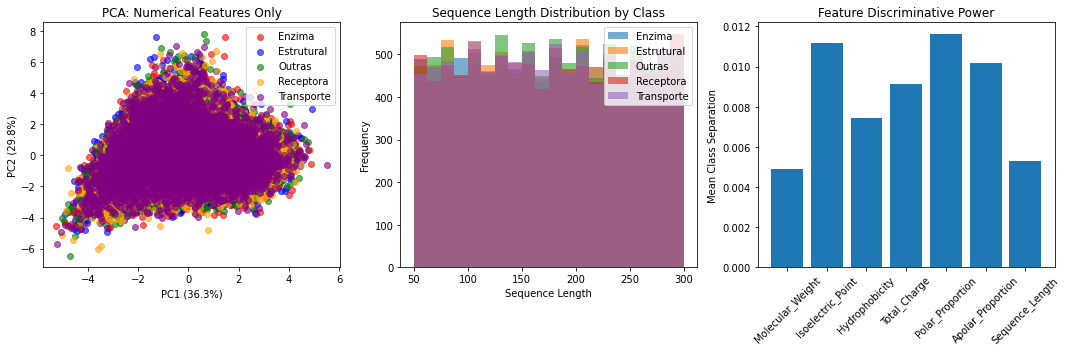


🔍 Most discriminative numerical features:
  Polar_Proportion: 0.012
  Isoelectric_Point: 0.011
  Apolar_Proportion: 0.010
  Total_Charge: 0.009
  Hydrophobicity: 0.007
  Sequence_Length: 0.005
  Molecular_Weight: 0.005


In [54]:
# Deep Data Investigation - Root Cause Analysis
print("=== DEEP DATA INVESTIGATION ===")

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check if classes are actually separable
print("🔍 SEPARABILITY ANALYSIS:")

# PCA on numerical features only
pca_num = PCA(n_components=2)
X_train_pca_num = pca_num.fit_transform(X_train_num)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(label_encoder.classes_)]
for i, class_name in enumerate(label_encoder.classes_):
    mask = y_train == i
    plt.scatter(X_train_pca_num[mask, 0], X_train_pca_num[mask, 1], 
               c=colors[i], label=class_name, alpha=0.6)
plt.title('PCA: Numerical Features Only')
plt.xlabel(f'PC1 ({pca_num.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_num.explained_variance_ratio_[1]*100:.1f}%)')
plt.legend()

# Check explained variance
total_var_explained = sum(pca_num.explained_variance_ratio_)
print(f"PCA Numerical: First 2 components explain {total_var_explained*100:.1f}% variance")

# 2. Check sequence diversity within classes
print(f"\n🔍 SEQUENCE DIVERSITY ANALYSIS:")

def sequence_similarity(seq1, seq2):
    """Simple sequence identity calculation"""
    if len(seq1) != len(seq2):
        return 0
    matches = sum(a == b for a, b in zip(seq1, seq2))
    return matches / len(seq1)

# Sample sequences from each class
class_similarities = {}
for i, class_name in enumerate(label_encoder.classes_):
    class_sequences = X_train_seq[y_train == i].tolist()[:50]  # Sample 50 sequences
    
    if len(class_sequences) < 2:
        class_similarities[class_name] = "Too few sequences"
        continue
        
    similarities = []
    for j in range(min(10, len(class_sequences))):
        for k in range(j+1, min(10, len(class_sequences))):
            if len(class_sequences[j]) > 0 and len(class_sequences[k]) > 0:
                # Align to shorter sequence for comparison
                min_len = min(len(class_sequences[j]), len(class_sequences[k]))
                sim = sequence_similarity(class_sequences[j][:min_len], 
                                       class_sequences[k][:min_len])
                similarities.append(sim)
    
    if similarities:
        avg_sim = np.mean(similarities)
        class_similarities[class_name] = f"{avg_sim:.3f}"
        print(f"  {class_name}: Average intra-class similarity = {avg_sim:.3f}")
    else:
        class_similarities[class_name] = "Could not calculate"

plt.subplot(1, 3, 2)
# Length distribution by class
for i, class_name in enumerate(label_encoder.classes_):
    class_lengths = [len(seq) for seq in X_train_seq[y_train == i]]
    plt.hist(class_lengths, alpha=0.6, label=class_name, bins=20)
plt.title('Sequence Length Distribution by Class')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
# Numerical feature correlation with target
feature_importance = []
for i, col in enumerate(numerical_cols):
    feature_vals = X_train_num.iloc[:, i]
    correlations = []
    for class_idx in range(len(label_encoder.classes_)):
        class_mask = y_train == class_idx
        if class_mask.sum() > 1:
            class_mean = feature_vals[class_mask].mean()
            overall_mean = feature_vals.mean()
            correlations.append(abs(class_mean - overall_mean))
    feature_importance.append(np.mean(correlations) if correlations else 0)

plt.bar(range(len(numerical_cols)), feature_importance)
plt.xticks(range(len(numerical_cols)), numerical_cols, rotation=45)
plt.title('Feature Discriminative Power')
plt.ylabel('Mean Class Separation')

plt.tight_layout()
plt.show()

print(f"\n🔍 Most discriminative numerical features:")
sorted_features = sorted(zip(numerical_cols, feature_importance), key=lambda x: x[1], reverse=True)
for feat, importance in sorted_features:
    print(f"  {feat}: {importance:.3f}")